# Python for biologists

## Tutorial B --> Read, process, and plot biological data (tabular format) 

*by Tobias Andermann*

In this tutorial you learn how to read data frames with python and how to select, transform, analyze, and plot the data.
You can find a data file named `petal_sepal_length.txt` in the tutorial folder. This file contains the measured lengths of petals and sepals of 50 individuals of the plant species `Iris pythonica` (fake data). All individuals are classified as the same species and we want to test if we can find any clustering of these characters or if they are continuously distributed. Some of the following steps are not necessary for this purpose but are meant to provide some useful commands whihc can be used in many different situations.

### 1. Install pandas
If not already installed you need to install the pandas python library. For this you can just type the following in your jupyter notebook or bash command line (without the `%%bash` in commandline mode):

```
%%bash
pip install pandas
```

### 2. Use pandas to read a dataframe
Use the `read_csv()` function to read the csv file. You have to specify how the cells in the file are delimited (`,` is the default), which in this case is tab-delimited (`\t`).

Note: the pandas library also has a very hand `read_excel()` function which can be used to read excel files directly (no exporting of data in csv format necessary). Try it out if you have some excel file on your computer that you want to read into python.

In [2]:
import pandas as pd
data = pd.read_csv('./petal_sepal_length.txt',sep='\t')

View the first 10 lines of the dataframe using `head()`.

In [3]:
data.head(10)

,sample_name,petal_length,sepal_length
0,sample1,2.037214,5.172704
1,sample2,4.915837,6.149615
2,sample3,1.614314,5.939969
3,sample4,1.525709,6.603432
4,sample5,3.729975,6.065105
5,sample6,0.778760,5.173370
6,sample7,5.291489,7.381162
7,sample8,5.486099,6.529424
8,sample9,1.588885,5.447183
9,sample10,3.506057,5.821899


Use the .iloc() function to extract a specific cell form the dataframe, e.g. the 2nd cell in the 2nd column (remember that python indexing starts with 0, so the element we want to print has the index 1,1):

In [10]:
data.iloc[1,1]

4.915837058559057

Check the column names of the dataframe:

In [4]:
data.columns

Index(['sample_name', 'petal_length', 'sepal_length'], dtype='object')

Extract one of the columns by name. You can either do it this way:

In [17]:
data.petal_length

0     2.037214
1     4.915837
2     1.614314
3     1.525709
4     3.729975
5     0.778760
6     5.291489
7     5.486099
8     1.588885
9     3.506057
10    1.034731
11    3.918415
12    4.704223
13    1.274312
14    4.027879
15    1.052670
16    5.124328
17    0.727854
18    1.889160
19    5.857770
20    0.982377
21    1.642252
22    1.813812
23    1.675574
24    1.402000
25    5.010073
26    1.547179
27    5.583385
28    5.602358
29    0.999512
30    6.357546
31    1.598450
32    6.383405
33    3.502309
34    1.489134
35    1.414486
36    4.695659
37    4.314651
38    4.332901
39    5.355377
40    4.215726
41    5.547972
42    4.877986
43    1.992262
44    1.514988
45    1.624965
46    1.600432
47    1.437563
48    1.549250
49    5.113597
Name: petal_length, dtype: float64

Or this way:

In [15]:
data['petal_length']

0     2.037214
1     4.915837
2     1.614314
3     1.525709
4     3.729975
5     0.778760
6     5.291489
7     5.486099
8     1.588885
9     3.506057
10    1.034731
11    3.918415
12    4.704223
13    1.274312
14    4.027879
15    1.052670
16    5.124328
17    0.727854
18    1.889160
19    5.857770
20    0.982377
21    1.642252
22    1.813812
23    1.675574
24    1.402000
25    5.010073
26    1.547179
27    5.583385
28    5.602358
29    0.999512
30    6.357546
31    1.598450
32    6.383405
33    3.502309
34    1.489134
35    1.414486
36    4.695659
37    4.314651
38    4.332901
39    5.355377
40    4.215726
41    5.547972
42    4.877986
43    1.992262
44    1.514988
45    1.624965
46    1.600432
47    1.437563
48    1.549250
49    5.113597
Name: petal_length, dtype: float64

Check length of dataframe:

In [5]:
len(data)

50

### 3. Transform and filter data frame:

Sort the dataframe by one of the column values, e.g. by the column `petal_length`.

In the example command I'm not storing the sorted dataframe, but am simply printing it to the screen. If you want to store the sorted dataframe, you can define the sorted dataframe as a new variable or use the `inplace=True` flag inside the command.

In [6]:
data.sort_values(by=['petal_length'],ascending=False).head(15)

,sample_name,petal_length,sepal_length
32,sample33,6.383405,5.473322
30,sample31,6.357546,6.109699
19,sample20,5.857770,4.775423
28,sample29,5.602358,5.734823
27,sample28,5.583385,6.768361
41,sample42,5.547972,6.519929
7,sample8,5.486099,6.529424
39,sample40,5.355377,6.257550
6,sample7,5.291489,7.381162
16,sample17,5.124328,5.799524


Let's say we want to find those samples, which have a petal length of more than 5. We can do that rather easily with pandas, using some simple indexing. If we use the square brackets `[]` it basically translates into "extract those elements where condition is fulfilled":

In [62]:
data[data.petal_length>5]

,sample_name,petal_length,sepal_length
6,sample7,5.291489,7.381162
7,sample8,5.486099,6.529424
16,sample17,5.124328,5.799524
19,sample20,5.857770,4.775423
25,sample26,5.010073,6.460642
27,sample28,5.583385,6.768361
28,sample29,5.602358,5.734823
30,sample31,6.357546,6.109699
32,sample33,6.383405,5.473322
39,sample40,5.355377,6.257550


Now let's store the data from the dataframe into lists:

In [18]:
petal_list = list(data.petal_length)
sepal_list = list(data.sepal_length)

### 4. Plot the data

In order to plot in python you need to import the library `matplotlib.pyplot`. If `matplotlib` is not already installed, do so by typing the following in your jupyter notebook or bash command line (without the `%%bash` in commandline mode):

```
%%bash
pip install matplotlib
```

Import the matplotlib.pyplot library and activate the plotting option in the jupyter notebook (activation not required if you are working in spyder).

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Now plot the data as a scatter plot

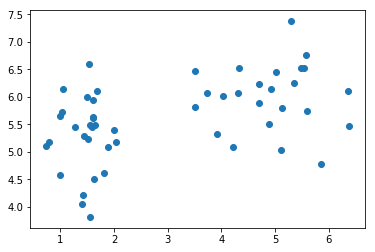

In [21]:
plt.scatter(petal_list,sepal_list)

You can modify the plot by adding labels to the axis. In python the plot is being modified in "layers", which means, every modification/addition is stated in a new line:

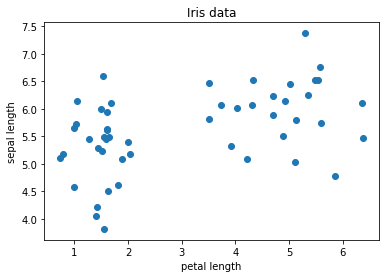

In [26]:
plt.scatter(petal_list,sepal_list)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris data')

You can change the color of the plot like this:

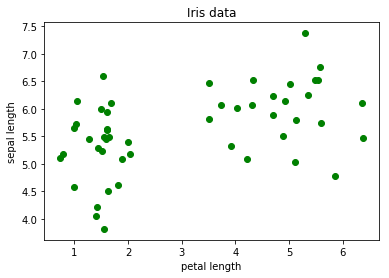

In [29]:
plt.scatter(petal_list,sepal_list,color='green')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris data')

Or change the shape of the plotted points:

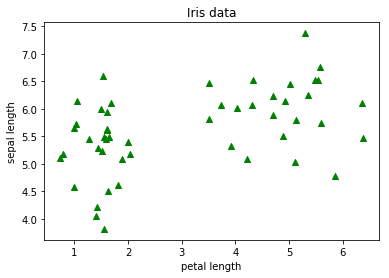

In [35]:
plt.scatter(petal_list,sepal_list,color='green',marker='^')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris data')

If you want to save a plot as a figure, you first need to define a figure object and after all your plotting commands you can use the function `savefig()`

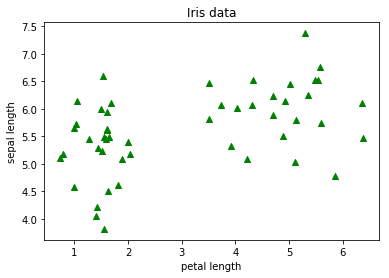

In [36]:
fig = plt.figure()
plt.scatter(petal_list,sepal_list,color='green',marker='^')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris data')
fig.savefig('./scatter_plot.pdf',bbox_inches='tight', dpi = 500)

You can adjust the figure size using the `figsize=()` argument inside the `plt.figure()` function:

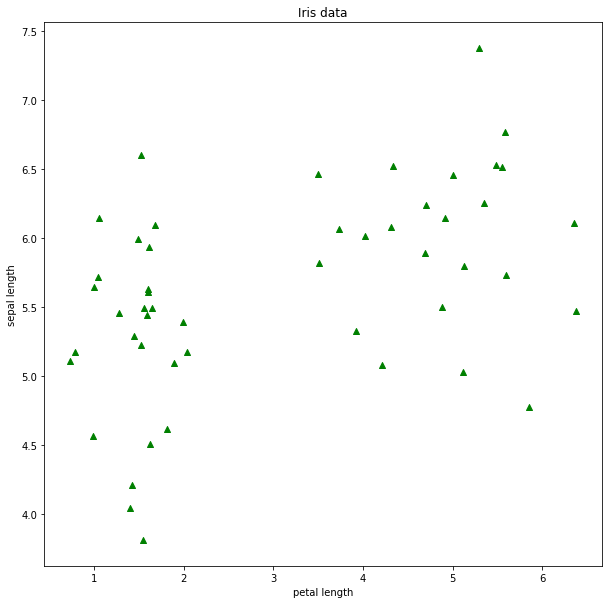

In [37]:
fig = plt.figure(figsize=(10,10))
plt.scatter(petal_list,sepal_list,color='green',marker='^')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris data')
fig.savefig('./scatter_plot.pdf',bbox_inches='tight', dpi = 500)

### 5. Identify clusters (supervised machine learning)

We can see in the plots above that the data points seem to cluster into two separate clusters (maybe representing separate populations or cryptic species. We can use the kmeans algorithm to identify clusters and automatically assign the data points belonging to each cluster. For this we use the `sklearn` python library, which contains many useful machine learning algorithms.

If not already installed you need to install the `sklearn` python library. For this you can just type the following in your jupyter notebook or bash command line (without the `%%bash` in commandline mode):

```
%%bash
pip install sklearn
```

Before we can use the `KMeans()` function of this library we need to slightly transform our data. This function want the data in tuple format, which means every datapoint should be contained in a seaprate tuple, which looks like this `(x_value1, y_value1), (x_value2, y_value2), ...`.

Currently our data is in list format, looking like this `[x_value1,x_value2,...]` and `[y_value1,y_value2,...]`. To transform these lists into the desired format we can use the `zip()` function. The zip function returns an object which we have to transform into a list again to make it visible, which we can do with the `list()` function:

In [42]:
tuple_data = list(zip(petal_list, sepal_list))
print(tuple_data)

[(2.037213545574565, 5.172704440755738), (4.915837058559057, 6.149615365303662), (1.6143144404422318, 5.939969222731516), (1.5257094629553694, 6.603431558181938), (3.7299754141452683, 6.065105089620714), (0.7787600224579809, 5.173369526730656), (5.291488606290831, 7.381162369515891), (5.486099357579179, 6.529423906221606), (1.5888847511006476, 5.447182516437644), (3.506056546470821, 5.821898711988933), (1.0347308723897142, 5.7191141594954535), (3.9184146064300767, 5.32433750535842), (4.704222691916959, 6.241320619454233), (1.2743118663460602, 5.460195145790823), (4.027879380970228, 6.018648753254772), (1.0526702377383088, 6.1491582372113704), (5.124327526301326, 5.799524450012601), (0.7278537859299755, 5.1110545058489665), (1.889159752975209, 5.09323743199745), (5.8577698329937276, 4.775423113784206), (0.9823765564976252, 4.5701405527312895), (1.642251547933402, 5.496335497225293), (1.8138118759285808, 4.62066074530137), (1.6755744474602847, 6.098174133374835), (1.4019996878544254, 4.0

Now we are ready to run the KMeans() function on our transformed tuple data. We have to provide how many clusters we believe there are in the data. Let's go with `2` for now (`n_clusters=2`):

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(tuple_data)

The output of the `KMeans()` command is stored as a variable which we named `kmeans`. From this variable we can extract the labels, which is the assignment of our data points to cluster 0 or cluster 1:

In [94]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

We can use that label array to color the points accordingly, using the `c=` flag in the `scatter()` function. Let's save the label array as a new variable `labels` which we then parse into the `scatter()` function:

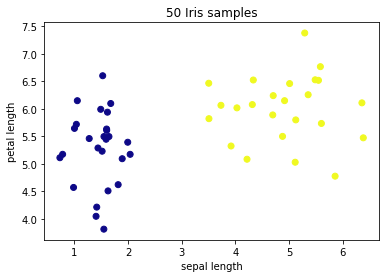

In [95]:
labels = kmeans.labels_

plt.scatter(petal_list,sepal_list,c=labels,cmap='plasma')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('50 Iris samples')

From the kmeans output you can also export the center points of each cluster. These are stored as the values `cluster_centers_` in the kmeans output:

In [96]:
center0,center1 = kmeans.cluster_centers_
print(center0)
print(center1)


[1.45414789 5.289111  ]
[4.89395901 6.00016191]


You can plot a point (or a list of points) using the `plot()` function. The `plot()` function needs the input data as x and y coordinates (`plot(x_coord,y_coord)`). Since our variables contain the x and y coordinates for each modpoint, we can plot each of these points by typing `plt.plot(center0[0],center0[1])` and `plt.plot(center1[0],center1[1]` respectively:

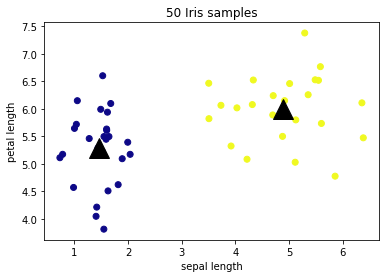

In [97]:
plt.scatter(petal_list,sepal_list,c=labels,cmap='plasma')
plt.plot(center0[0],center0[1],marker='^',color='black',markersize=20)
plt.plot(center1[0],center1[1],marker='^',color='black',markersize=20)

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('50 Iris samples')

<div class="alert alert-block alert-warning">
**Task:** Run the kmeans algorithm for 4 clusters (`n_clusters=4`), plot all four clusters including the center points, and save the plot as a pdf file.
</div>


The output should look like this:

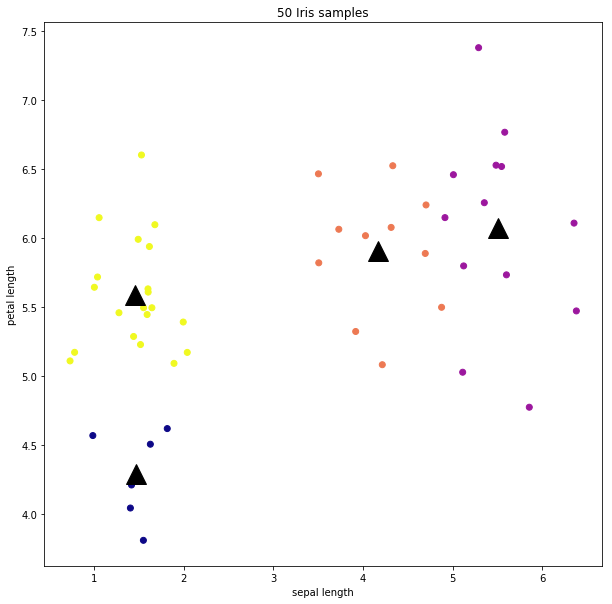